In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os

import pandas as pd
import matplotlib.pyplot as plt

from aptr.database import RnaDB
from aptr.oor_distance import oor_distance

In [9]:
db = RnaDB()

0.9989129450131352 sequences remain after trimming
0.37059516260530845 sequences remain after filtering


In [10]:
# Filter to complete genomes and print count of remaining genomes

db_filtered = db.db[db.db["genome_status"] == "Complete"]
print(len(db_filtered["genome"].unique()))

1633


In [11]:
# For each genome, get the difference between max and min oor distance

best_spreads = (
    db_filtered["oor_distance"].groupby(db_filtered["genome"]).apply(lambda x: x.max() - x.min()).sort_values(ascending=False)
)
best_spreads.head(10)

genome
2026188.14    0.996549
2704462.3     0.992947
39488.252     0.989904
986075.10     0.985696
2594004.3     0.982248
315271.3      0.976720
2561898.4     0.974824
2518973.4     0.972254
227.4         0.972012
2172099.4     0.970779
Name: oor_distance, dtype: float64

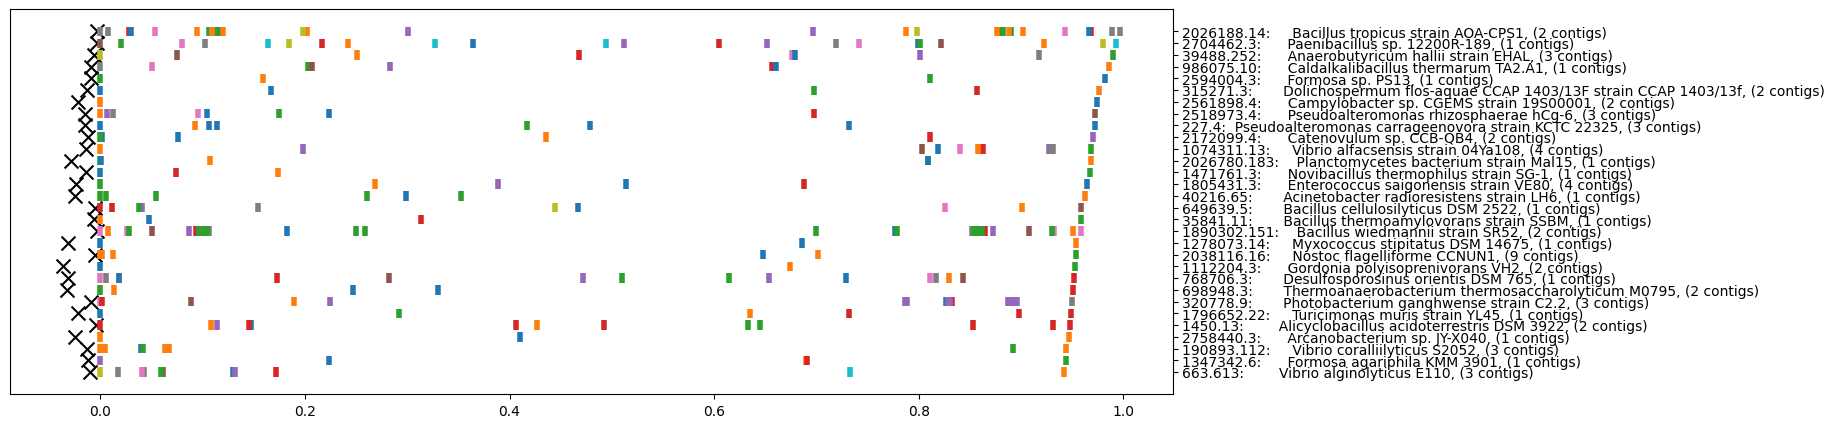

In [12]:
from matplotlib import cm
import numpy as np

N_GENOMES = 30

def visualize_genome(gid, height=0, dist=None, db=db):
    g = db[gid]
    colors = cm.tab10(g["md5"].astype("category").cat.codes)
    offset = g["oor_distance"].min()
    plt.vlines(g["oor_distance"] - offset, -height - 0.4, -height + 0.4, colors=colors, lw=4)
    plt.scatter(-offset, -height, color="black", s=100, marker="x")


fig, ax = plt.subplots(figsize=(15, 5))
for i, gid in enumerate(best_spreads.iloc[:N_GENOMES].index):
    visualize_genome(gid, i, best_spreads[gid])

# Yticks on the right
plt.gca().yaxis.tick_right()
plt.yticks(
    np.arange(0, -N_GENOMES, -1),
    [f"{gid}:\t{db[gid]['genome_name'].iloc[0]}, ({db[gid]['n_contigs'].iloc[0]} contigs)".expandtabs() for gid in best_spreads.index[:N_GENOMES]],
)
plt.show()

In [13]:
db_unfiltered = RnaDB(bypass_filter=True)

0.9989129450131352 sequences remain after trimming
0.9989129450131352 sequences remain after filtering


5


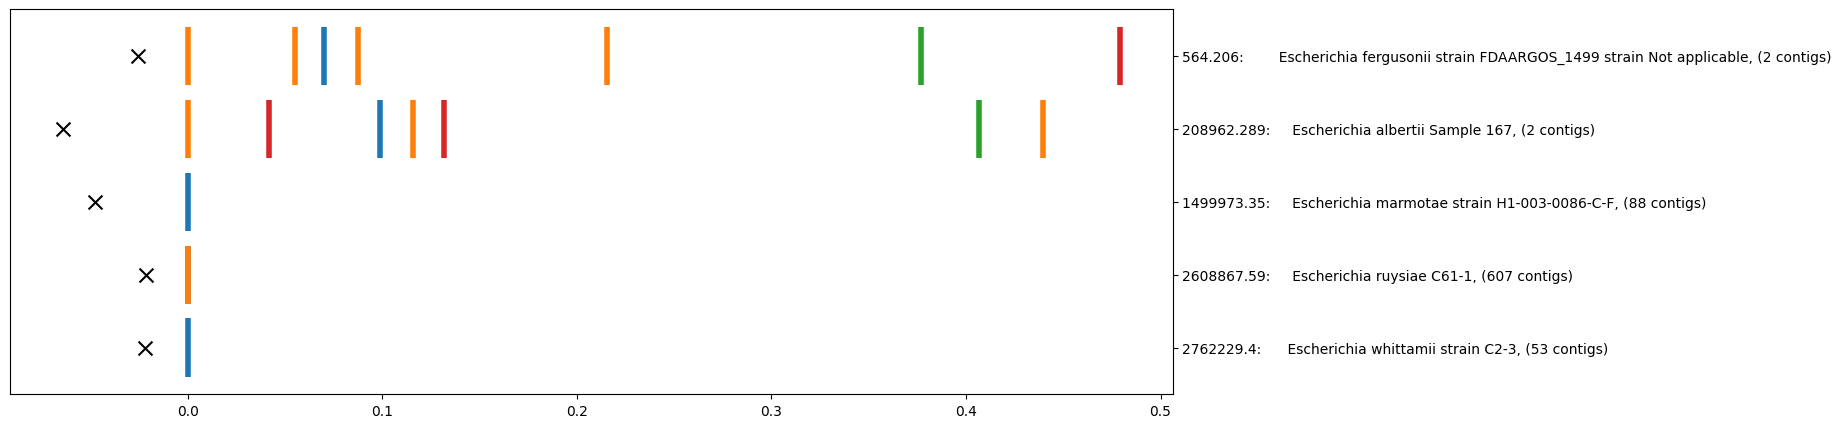

In [14]:
# Just bacilli

# Filter to complete genomes and print count of remaining genomes
db_filtered2 = db_unfiltered.db[db_unfiltered.db["genome_name"].str.contains("Escherichia")]
print(len(db_filtered2["genome"].unique()))

# Get spreads
best_spreads2 = (
    db_filtered2["oor_distance"].groupby(db_filtered2["genome"]).apply(lambda x: x.max() - x.min()).sort_values(ascending=False)
)

# Plot
fig, ax = plt.subplots(figsize=(15, 5))
for i, gid in enumerate(best_spreads2.index):
    visualize_genome(gid, i, db_unfiltered[gid], db=db_unfiltered)

# Yticks on the right
plt.gca().yaxis.tick_right()
plt.yticks(
    np.arange(0, -len(best_spreads2), -1),
    [f"{gid}:\t{db_unfiltered[gid]['genome_name'].iloc[0]}, ({db_unfiltered[gid]['n_contigs'].iloc[0]} contigs)".expandtabs() for gid in best_spreads2.index],
)
plt.show()

In [15]:
[x for x in db_unfiltered.db.genome_name.unique() if x.find("Escherichia") != -1]

['Escherichia ruysiae C61-1',
 'Escherichia albertii Sample 167',
 'Escherichia fergusonii strain FDAARGOS_1499 strain Not applicable',
 'Escherichia whittamii strain C2-3',
 'Escherichia marmotae strain H1-003-0086-C-F']

In [16]:
patric_table = pd.read_table("/teamspace/studios/this_studio/aPTR/data/patric_table.tsv.gz")
patric_table

,genome.genome_id,genome.contigs,genome.genome_length,genome.genome_name,genome.genome_status,feature.accession,feature.start,feature.end,feature.strand,feature.patric_id,feature.product,feature.accession.1,feature.start.1,feature.end.1,feature.strand.1,feature.patric_id.1,feature.na_sequence,feature.na_sequence_md5,feature.product.1
0,53410.90,4,6456568,Pseudomonas ficuserectae ZJDX-003,Complete,CP085684,6091615,6093150,+,fig|53410.9.peg.5746,Chromosomal replication initiator protein DnaA,CP085684,700116,701659,+,fig|53410.9.rna.3,tttgaactgaagagtttgatcatggctcagattgaacgctggcggc...,d83ce20c7370984bf161dc5d563a8d7b,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"
1,53410.90,4,6456568,Pseudomonas ficuserectae ZJDX-003,Complete,CP085684,6091615,6093150,+,fig|53410.9.peg.5746,Chromosomal replication initiator protein DnaA,CP085684,5941582,5943125,-,fig|53410.9.rna.80,tttgaactgaagagtttgatcatggctcagattgaacgctggcggc...,d83ce20c7370984bf161dc5d563a8d7b,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"
2,53410.90,4,6456568,Pseudomonas ficuserectae ZJDX-003,Complete,CP085684,6091615,6093150,+,fig|53410.9.peg.5746,Chromosomal replication initiator protein DnaA,CP085684,3826303,3827846,-,fig|53410.9.rna.48,tttgaactgaagagtttgatcatggctcagattgaacgctggcggc...,14a6b1505d72c5d551b0175d2c5f0887,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"
3,53410.90,4,6456568,Pseudomonas ficuserectae ZJDX-003,Complete,CP085684,6091615,6093150,+,fig|53410.9.peg.5746,Chromosomal replication initiator protein DnaA,CP085684,5081029,5082572,-,fig|53410.9.rna.64,tttgaactgaagagtttgatcatggctcagattgaacgctggcggc...,d83ce20c7370984bf161dc5d563a8d7b,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"
4,53410.90,4,6456568,Pseudomonas ficuserectae ZJDX-003,Complete,CP085684,6091615,6093150,+,fig|53410.9.peg.5746,Chromosomal replication initiator protein DnaA,CP085684,5350038,5351581,-,fig|53410.9.rna.71,tttgaactgaagagtttgatcatggctcagattgaacgctggcggc...,d83ce20c7370984bf161dc5d563a8d7b,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33112,472693.28,3,3839721,Pantoea eucrina strain XL123,Complete,CP083448,1,1404,+,fig|472693.28.peg.1,Chromosomal replication initiator protein DnaA,CP083448,3337940,3339487,-,fig|472693.28.rna.108,cttaaattgaagagtttgatcatggctcagattgaacgctggcggc...,bbab9ba4d4fe64c9fbc5a94d55e40364,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"
33113,475937.30,1,5632343,Rhodopseudomonas boonkerdii NS23,Complete,CP036537,1,1431,+,fig|475937.3.peg.1,Chromosomal replication initiator protein DnaA,CP036537,5175098,5176590,-,fig|475937.3.rna.51,gtccaacttgagagtttgatcctggctcagagcgaacgctggcggc...,e3134db2eb657738699287e6db6b10d1,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"
33114,47958.50,61,5637136,Methylorubrum thiocyanatum JCM 10893,WGS,BPRF01000012,76226,77731,+,fig|47958.5.peg.2538,Chromosomal replication initiator protein DnaA,BPRF01000043,7,1497,-,fig|47958.5.rna.52,cttcaacttgagagtttgatcctggctcagagcgaacgctggcggc...,74997ebfd5bcf39d11e33a3124518907,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"
33115,481446.16,19,3974251,Phaeobacter italicus strain DP7Y7-1,WGS,JAHVIJ010000005,14022,15440,-,fig|481446.16.peg.2650,Chromosomal replication initiator protein DnaA,JAHVIJ010000014,3927,5393,-,fig|481446.16.rna.62,gtttcaacttgagagtttgatcctggctcagaacgaacgctggcgg...,fc9e519ccaadc58a2b7fa03e2395a203,"SSU rRNA ## 16S rRNA, small subunit ribosomal RNA"


In [17]:
[x for x in patric_table["genome.genome_name"].unique() if x.find("Escherichia") != -1]

['Escherichia ruysiae C61-1',
 'Escherichia albertii Sample 167',
 'Escherichia fergusonii strain FDAARGOS_1499 strain Not applicable',
 'Escherichia whittamii strain C2-3',
 'Escherichia marmotae strain H1-003-0086-C-F']